# AC current calculation manim illustrations

In [3]:
from manim import * 

In [3]:
from manim import *

class SineCurveUnitCircle4(Scene):
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dots_and_draw_curves()
        self.add_arrow_labels()
        self.wait(15)

    def show_axis(self):
        # Main x-axis
        x_start = np.array([-6, 0, 0])
        x_end = np.array([6, 0, 0])

        # Main y-axis
        y_start = np.array([-4, -3, 0])
        y_end = np.array([-4, 3, 0])

        x_axis = Arrow(x_start, x_end)
        y_axis = Line(y_start, y_end)

        # Sine curve's y-axis
        sine_y_start = np.array([-2, -3, 0])
        sine_y_end = np.array([-2, 3, 0])
        sine_y_axis = Arrow(sine_y_start, sine_y_end, color=WHITE, stroke_width=2)
        
#         axis labels:
        axis_x_label=MathTex(r"\theta=\omega t").move_to(x_axis.get_center()+RIGHT*6+DOWN)
        axis_y_label=MathTex(r"a_1=A_1 \sin{\theta}").move_to(sine_y_axis.get_center()+UP*3+RIGHT*2)

        self.add(x_axis, y_axis, sine_y_axis, axis_x_label, axis_y_label)
        self.add_x_labels()

        self.origin_point = np.array([-4, 0, 0])
        self.curve_start = np.array([-2, 0, 0])  # Added spacing from the circle

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2 * i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        # Change circle radius
        self.circle_radius = 2
        circle = Circle(radius=self.circle_radius, color=WHITE)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dots_and_draw_curves(self):
        orbit = self.circle
        origin_point = self.origin_point

        # First dot
        dot1 = Dot(radius=0.08, color=YELLOW)
        dot1.move_to(orbit.point_from_proportion(0))

        self.t_offset = 0
        rate = 0.125

        def go_around_circle_first(mob, dt):
            self.t_offset += (dt * rate)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def go_around_circle_second(mob, dt):
            self.t_offset += (dt * rate)
            mob.move_to(orbit.point_from_proportion((self.t_offset + 0.25) % 1))

        # Adjust arrow lengths
        def get_line_to_circle(dot, color, length=None):
            length = length if length else self.circle_radius
            return Arrow(origin_point, dot.get_center(), color=color, buff=0, max_tip_length_to_length_ratio=0.15).scale(length / self.circle_radius)

        def get_line_to_curve(dot, color):
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x, y, 0]), color=color, stroke_width=2)

        # Separate curve groups for each dot
        curve1 = VGroup()
        curve1.add(Line(self.curve_start, self.curve_start))

        def get_curve(dot, curve_group, color):
            last_line = curve_group[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(), np.array([x, y, 0]), color=color)
            curve_group.add(new_line)
            return curve_group

        # Adding updaters to dots
        dot1.add_updater(go_around_circle_first)
       

        origin_to_circle_line1 = always_redraw(lambda: get_line_to_circle(dot1, BLUE))
        

        dot_to_curve_line1 = always_redraw(lambda: get_line_to_curve(dot1, YELLOW_A))
       

        sine_curve_line1 = always_redraw(lambda: get_curve(dot1, curve1, BLUE))
        

        # Add elements to the scene
        self.add(dot1)
        self.add(orbit, origin_to_circle_line1)
        self.add(dot_to_curve_line1)
        self.add(sine_curve_line1)

    def add_arrow_labels(self):
        # Add labels A1 and A2 to the rotating arrows
        label1 = always_redraw(lambda: MathTex("A_1").next_to(self.circle.point_from_proportion(self.t_offset % 1), UP))
        self.add(label1)

        
%manim -qh -v WARNING SineCurveUnitCircle4

Manim Community v0.18.1

In [4]:
from manim import *

class SineCurveUnitCircle6(Scene):
    def construct(self):
        self.show_axis()
        self.show_circles()
        self.move_dots_and_draw_curves()
        self.add_arrow_labels()
        self.show_angle_arc()
        self.wait(15)  # Longer animation for full rotation

    def show_axis(self):
        # Main x-axis
        x_start = np.array([-6, 0, 0])
        x_end = np.array([6, 0, 0])

        # Main y-axis
        y_start = np.array([-4, -3, 0])
        y_end = np.array([-4, 3, 0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        # Sine curve's y-axis
        sine_y_start = np.array([-2, -3, 0])
        sine_y_end = np.array([-2, 3, 0])
        sine_y_axis = Line(sine_y_start, sine_y_end, color=WHITE, stroke_width=2)

        self.add(x_axis, y_axis, sine_y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4, 0, 0])
        self.curve_start = np.array([-2, 0, 0])  # Added spacing from the circle

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2 * i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circles(self):
        # Circle for arrow 1
        self.circle_radius = 2
        circle1 = Circle(radius=self.circle_radius, color=WHITE)
        circle1.move_to(self.origin_point)
        self.add(circle1)
        self.circle1 = circle1

        # Circle for arrow 2
        self.circle_radius_2 = 1.5
        circle2 = Circle(radius=self.circle_radius_2, color=BLUE_D)
        circle2.move_to(self.origin_point)
        self.add(circle2)
        self.circle2 = circle2

    def move_dots_and_draw_curves(self):
        orbit1 = self.circle1
        orbit2 = self.circle2
        origin_point = self.origin_point

        # Dot 1
        dot1 = Dot(radius=0.08, color=WHITE)
        dot1.move_to(orbit1.point_from_proportion(0))

        # Dot 2 (phase-shifted by pi/2)
        dot2 = Dot(radius=0.08, color=BLUE)
        dot2.move_to(orbit2.point_from_proportion(0))

        self.t_offset = 0
        rate = 0.05  # Slower rotation for longer animation

        def go_around_circle_first(mob, dt):
            self.t_offset += (dt * rate)
            mob.move_to(orbit1.point_from_proportion(self.t_offset % 1))

        def go_around_circle_second(mob, dt):
            self.t_offset += (dt * rate)
            mob.move_to(orbit2.point_from_proportion((self.t_offset) % 1))

        # Arrow definitions
        def get_line_to_circle(dot, color, length=None):
            length = length if length else self.circle_radius
            return Arrow(origin_point, dot.get_center(), color=color, buff=0, max_tip_length_to_length_ratio=0.15).scale(length / self.circle_radius)

        # Line to sinusoidal curve
        def get_line_to_curve(dot, color):
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x, y, 0]), color=color, stroke_width=2)

        # Sinusoidal curves
        curve1 = VGroup()
        curve1.add(Line(self.curve_start, self.curve_start))

        curve2 = VGroup()
        curve2.add(Line(self.curve_start, self.curve_start))

        def get_curve(dot, curve_group, color):
            last_line = curve_group[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(), np.array([x, y, 0]), color=color)
            curve_group.add(new_line)
            return curve_group

        # Updaters for arrows and dots
        dot1.add_updater(go_around_circle_first)
        dot2.add_updater(go_around_circle_second)

        origin_to_circle_line1 = always_redraw(lambda: get_line_to_circle(dot1, WHITE))
        origin_to_circle_line2 = always_redraw(lambda: get_line_to_circle(dot2, BLUE))

        dot_to_curve_line1 = always_redraw(lambda: get_line_to_curve(dot1, WHITE))
        dot_to_curve_line2 = always_redraw(lambda: get_line_to_curve(dot2, BLUE_A))

        sine_curve_line1 = always_redraw(lambda: get_curve(dot1, curve1, WHITE))
        sine_curve_line2 = always_redraw(lambda: get_curve(dot2, curve2, BLUE_D))

        # Add elements to the scene
        self.add(dot1, dot2)
        self.add(orbit1, orbit2, origin_to_circle_line1, origin_to_circle_line2)
        self.add(dot_to_curve_line1, dot_to_curve_line2)
        self.add(sine_curve_line1, sine_curve_line2)

    def add_arrow_labels(self):
        # Labels for A1 and A2
        label1 = always_redraw(lambda: MathTex("U_m").next_to(self.circle1.point_from_proportion(self.t_offset % 1), UP))
        label2 = always_redraw(lambda: MathTex("I_m").set_color(BLUE).next_to(self.circle2.point_from_proportion((self.t_offset) % 1), UP))
        self.add(label1, label2)

    def show_angle_arc(self):
        # Arc to show the angle between arrows
        def get_angle_arc():
            return Arc(
                radius=0.5,
                start_angle=(self.t_offset % 1) * TAU,
                angle=PI / 4,
                arc_center=self.origin_point,
                color=WHITE,
            )

        def get_angle_label():
            arc_mid_angle = (self.t_offset % 1) * TAU + PI / 8
            label_position = np.array([
                self.origin_point[0] + 0.6 * np.cos(arc_mid_angle),
                self.origin_point[1] + 0.6 * np.sin(arc_mid_angle),
                0,
            ])
            return MathTex(r"\phi_0").move_to(label_position)

#         arc = always_redraw(get_angle_arc)
#         angle_label = always_redraw(get_angle_label)

#         self.add(arc, angle_label)

%manim -qh -v WARNING SineCurveUnitCircle6

Manim Community v0.18.1

Manim Community v0.18.1

In [2]:
from manim import *

class SineCurveSumOfVectorsL0_f(Scene):
    def construct(self):
        t=Tex("Yrgyldylaryň goşulyşy").to_edge(UP).scale(0.8)
        a=Tex(r"$@$"+"takykbilim").to_corner(DR).scale(0.8)
        
#         self.add(t, a)
        
        self.show_axis()
        self.move_dots_and_draw_curves()
        self.add_arrow_labels()
        self.show_angle_arc()
        self.wait(30)  # Longer animation for full visualization

    def show_axis(self):
        # Main x-axis
        x_start = np.array([-6, 0, 0])
        x_end = np.array([6, 0, 0])

        # Main y-axis
        y_start = np.array([-4, -3, 0])
        y_end = np.array([-4, 3, 0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        # Sine curve's y-axis
        sine_y_start = np.array([-2, -3, 0])
        sine_y_end = np.array([-2, 3, 0])
        sine_y_axis = Line(sine_y_start, sine_y_end, color=WHITE, stroke_width=2)
        
#         add labels:
        axis_x_label=MathTex(r"\theta=\omega t").move_to(x_axis.get_center()+RIGHT*6+DOWN)
        axis_y_label1=MathTex(r"I_m").move_to(sine_y_axis.get_center()+UP*3+RIGHT*2).set_color(BLUE)
        axis_y_label2=MathTex(r"U_m").next_to(axis_y_label1, RIGHT).set_color(WHITE)

        self.add(x_axis, y_axis, sine_y_axis, axis_x_label, axis_y_label1, axis_y_label2)
        self.add_x_labels()

        self.origin_point = np.array([-4, 0, 0])
        self.curve_start = np.array([-2, 0, 0])  # Added spacing for curves

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2 * i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def move_dots_and_draw_curves(self):
        origin_point = self.origin_point

        self.t_offset = 0
        rate = 0.09  # Slower rotation for longer animation

        # Function to calculate arrow endpoints
        def get_arrow_vector(angle_offset, magnitude):
            angle = (self.t_offset + angle_offset) * TAU
            return np.array([
                origin_point[0] + magnitude * np.cos(angle),
                origin_point[1] + magnitude * np.sin(angle),
                0
            ])

        # Arrow 1 (A1)
        magnitude1 = 1.5
        def get_line_to_arrow1():
            endpoint = get_arrow_vector(0, magnitude1)
            return Arrow(origin_point, endpoint, color=BLUE, buff=0)

        # Arrow 2 (A2)
        magnitude2 = 2.5
        def get_line_to_arrow2():
            endpoint = get_arrow_vector(0.25, magnitude2)
            return Arrow(origin_point, endpoint, color=WHITE, buff=0)
       
        # Assign arrows with updaters
        self.arrow1 = always_redraw(get_line_to_arrow1)
        self.arrow2 = always_redraw(get_line_to_arrow2)
        

        # Add arrows to the scene
        self.add(self.arrow1, self.arrow2)

        # Sinusoidal Curves
        curve1 = VGroup()
        curve1.add(Line(self.curve_start, self.curve_start))

        curve2 = VGroup()
        curve2.add(Line(self.curve_start, self.curve_start))

        # Function to create a curve
        def get_curve(dot, curve_group, color):
            last_line = curve_group[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(), np.array([x, y, 0]), color=color)
            curve_group.add(new_line)
            return curve_group

        # Dot objects
        dot1 = Dot(radius=0.08, color=BLUE)
        dot2 = Dot(radius=0.08, color=GREEN)

        def update_dots(mob, dt):
            self.t_offset += dt * rate
            dot1.move_to(self.arrow1.get_end())
            dot2.move_to(self.arrow2.get_end())
            

        dot1.add_updater(update_dots)
        self.add(dot1, dot2)
        
        def get_line_to_curve(dot, color):
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x, y, 0]), color=color, stroke_width=2)

        # Always redraw curves
        sine_curve1 = always_redraw(lambda: get_curve(dot1, curve1, BLUE))
        sine_curve2 = always_redraw(lambda: get_curve(dot2, curve2, WHITE))
        
        
        dot_to_curve_line1 = always_redraw(lambda: get_line_to_curve(dot1, BLUE_A))
        dot_to_curve_line2 = always_redraw(lambda: get_line_to_curve(dot2, GREEN_A))
        

        # Add curves
        self.add(sine_curve1, sine_curve2, dot_to_curve_line1, dot_to_curve_line2)

    def add_arrow_labels(self):
        # Labels for A1, A2, and A
        label1 = always_redraw(lambda: MathTex(r"A_m").next_to(self.arrow1.get_end(), UP))
        label2 = always_redraw(lambda: MathTex(r"U_m").next_to(self.arrow2.get_end(), UP))
        self.add(label1, label2)

    def show_angle_arc(self):
        # Arc to show the angle between arrows A1 and A2
        def get_angle_arc():
            return Arc(
                radius=0.5,
                start_angle=(self.t_offset % 1) * TAU,
                angle=PI / 2,
                arc_center=self.origin_point,
                color=WHITE,
            )

        def get_angle_label():
            arc_mid_angle = (self.t_offset % 1) * TAU + PI / 4
            label_position = np.array([
                self.origin_point[0] + 0.6 * np.cos(arc_mid_angle),
                self.origin_point[1] + 0.6 * np.sin(arc_mid_angle),
                0,
            ])
            return MathTex(r"\pi/2").move_to(label_position)

        arc = always_redraw(get_angle_arc)
        angle_label = always_redraw(get_angle_label)

        self.add(arc, angle_label)
        
%manim -qh -v WARNING SineCurveSumOfVectorsL0_f

Manim Community v0.18.1

KeyboardInterrupt: 

In [303]:
from manim import *

class SineCurveSumOfVectorsC0_f(Scene):
    def construct(self):
        t=Tex("Yrgyldylaryň goşulyşy").to_edge(UP).scale(0.8)
        a=Tex(r"$@$"+"takykbilim").to_corner(DR).scale(0.8)
        
#         self.add(t, a)
        
        self.show_axis()
        self.move_dots_and_draw_curves()
        self.add_arrow_labels()
        self.show_angle_arc()
        self.wait(30)  # Longer animation for full visualization

    def show_axis(self):
        # Main x-axis
        x_start = np.array([-6, 0, 0])
        x_end = np.array([6, 0, 0])

        # Main y-axis
        y_start = np.array([-4, -3, 0])
        y_end = np.array([-4, 3, 0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        # Sine curve's y-axis
        sine_y_start = np.array([-2, -3, 0])
        sine_y_end = np.array([-2, 3, 0])
        sine_y_axis = Line(sine_y_start, sine_y_end, color=WHITE, stroke_width=2)
        
#         add labels:
        axis_x_label=MathTex(r"\theta=\omega t").move_to(x_axis.get_center()+RIGHT*6+DOWN)
        axis_y_label1=MathTex(r"U_m").move_to(sine_y_axis.get_center()+UP*3+RIGHT*2).set_color(WHITE)
        axis_y_label2=MathTex(r"I_m").next_to(axis_y_label1, RIGHT).set_color(BLUE)

        self.add(x_axis, y_axis, sine_y_axis, axis_x_label, axis_y_label1, axis_y_label2)
        self.add_x_labels()

        self.origin_point = np.array([-4, 0, 0])
        self.curve_start = np.array([-2, 0, 0])  # Added spacing for curves

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2 * i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def move_dots_and_draw_curves(self):
        origin_point = self.origin_point

        self.t_offset = 0
        rate = 0.09  # Slower rotation for longer animation

        # Function to calculate arrow endpoints
        def get_arrow_vector(angle_offset, magnitude):
            angle = (self.t_offset + angle_offset) * TAU
            return np.array([
                origin_point[0] + magnitude * np.cos(angle),
                origin_point[1] + magnitude * np.sin(angle),
                0
            ])

        # Arrow 1 (A1)
        magnitude1 = 2.5
        def get_line_to_arrow1():
            endpoint = get_arrow_vector(0, magnitude1)
            return Arrow(origin_point, endpoint, color=WHITE, buff=0)

        # Arrow 2 (A2)
        magnitude2 = 1.5
        def get_line_to_arrow2():
            endpoint = get_arrow_vector(0.25, magnitude2)
            return Arrow(origin_point, endpoint, color=BLUE, buff=0)
       
        # Assign arrows with updaters
        self.arrow1 = always_redraw(get_line_to_arrow1)
        self.arrow2 = always_redraw(get_line_to_arrow2)
        

        # Add arrows to the scene
        self.add(self.arrow1, self.arrow2)

        # Sinusoidal Curves
        curve1 = VGroup()
        curve1.add(Line(self.curve_start, self.curve_start))

        curve2 = VGroup()
        curve2.add(Line(self.curve_start, self.curve_start))

        # Function to create a curve
        def get_curve(dot, curve_group, color):
            last_line = curve_group[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(), np.array([x, y, 0]), color=color)
            curve_group.add(new_line)
            return curve_group

        # Dot objects
        dot1 = Dot(radius=0.08, color=BLUE)
        dot2 = Dot(radius=0.08, color=GREEN)

        def update_dots(mob, dt):
            self.t_offset += dt * rate
            dot1.move_to(self.arrow1.get_end())
            dot2.move_to(self.arrow2.get_end())
            

        dot1.add_updater(update_dots)
        self.add(dot1, dot2)
        
        def get_line_to_curve(dot, color):
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x, y, 0]), color=color, stroke_width=2)

        # Always redraw curves
        sine_curve1 = always_redraw(lambda: get_curve(dot1, curve1, WHITE))
        sine_curve2 = always_redraw(lambda: get_curve(dot2, curve2, BLUE))
        
        
        dot_to_curve_line1 = always_redraw(lambda: get_line_to_curve(dot1, BLUE_A))
        dot_to_curve_line2 = always_redraw(lambda: get_line_to_curve(dot2, GREEN_A))
        

        # Add curves
        self.add(sine_curve1, sine_curve2, dot_to_curve_line1, dot_to_curve_line2)

    def add_arrow_labels(self):
        # Labels for A1, A2, and A
        label1 = always_redraw(lambda: MathTex(r"U_m").next_to(self.arrow1.get_end(), UP))
        label2 = always_redraw(lambda: MathTex(r"I_m").next_to(self.arrow2.get_end(), UP))
        self.add(label1, label2)

    def show_angle_arc(self):
        # Arc to show the angle between arrows A1 and A2
        def get_angle_arc():
            return Arc(
                radius=0.5,
                start_angle=(self.t_offset % 1) * TAU,
                angle=PI / 2,
                arc_center=self.origin_point,
                color=WHITE,
            )

        def get_angle_label():
            arc_mid_angle = (self.t_offset % 1) * TAU + PI / 4
            label_position = np.array([
                self.origin_point[0] + 0.6 * np.cos(arc_mid_angle),
                self.origin_point[1] + 0.6 * np.sin(arc_mid_angle),
                0,
            ])
            return MathTex(r"\pi/2").move_to(label_position)

        arc = always_redraw(get_angle_arc)
        angle_label = always_redraw(get_angle_label)

        self.add(arc, angle_label)
        
%manim -qh -v WARNING SineCurveSumOfVectorsC0_f

Manim Community v0.18.1

In [331]:
from manim import *
import numpy as np 

class SineCurveSumOfVectors1_f(Scene):
    def construct(self):
        t=Tex("Yrgyldylaryň goşulyşy").to_edge(UP).scale(0.8)
        a=Tex(r"$@$"+"takykbilim").to_corner(DR).scale(0.8)
        
#         self.add(t, a)
        
        self.show_axis()
        self.move_dots_and_draw_curves()
        self.add_arrow_labels()
        self.show_angle_arc()
        self.wait(30)  # Longer animation for full visualization

    def show_axis(self):
        # Main x-axis
        x_start = np.array([-6, 0, 0])
        x_end = np.array([6, 0, 0])

        # Main y-axis
        y_start = np.array([-4, -3, 0])
        y_end = np.array([-4, 3, 0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        # Sine curve's y-axis
        sine_y_start = np.array([-2, -3, 0])
        sine_y_end = np.array([-2, 3, 0])
        sine_y_axis = Line(sine_y_start, sine_y_end, color=WHITE, stroke_width=2)

        self.add(x_axis, y_axis, sine_y_axis)
        self.add_x_labels()
        
#         adding axis labels 
        axis_x_label=MathTex(r"\theta=\omega t").move_to(x_axis.get_center()+RIGHT*6+DOWN)
        axis_y_label1=MathTex(r"a_1=A_1 \sin{\omega t}, ").move_to(sine_y_axis.get_center()+UP*3+RIGHT*2.5).set_color(BLUE).scale(0.8)
        axis_y_label2=MathTex(r"a_2=A_2 \sin{(\omega t+\phi_0)}").next_to(axis_y_label1, RIGHT).set_color(GREEN).scale(0.8)
        axis_y_label3=MathTex(r"a_3=a_1+a_2", substrings_to_isolate=[r"a_3", r"a_1", r"a_2"]).next_to(axis_y_label2, DOWN).scale(0.8)
        
        axis_y_label3.set_color_by_tex(r"a_3", RED)
        axis_y_label3.set_color_by_tex(r"a_1", BLUE)
        axis_y_label3.set_color_by_tex(r"a_2", GREEN)
        
        self.add(axis_x_label, axis_y_label1, axis_y_label2, axis_y_label3)
        
        self.origin_point = np.array([-4, 0, 0])
        self.curve_start = np.array([-2, 0, 0])  # Added spacing for curves

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2 * i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def move_dots_and_draw_curves(self):
        origin_point = self.origin_point

        self.t_offset = 0
        rate = 0.05  # Slower rotation for longer animation

        # Function to calculate arrow endpoints
        def get_arrow_vector(angle_offset, magnitude):
            angle = (self.t_offset + angle_offset) * TAU
            return np.array([
                origin_point[0] + magnitude * np.cos(angle),
                origin_point[1] + magnitude * np.sin(angle),
                0
            ])

        # Arrow 1 (A1)
        magnitude1 = 2
        def get_line_to_arrow1():
            endpoint = get_arrow_vector(0, magnitude1)
            return Arrow(origin_point, endpoint, color=BLUE, buff=0)

        # Arrow 2 (A2)
        magnitude2 = 1.5
        def get_line_to_arrow2():
            endpoint = get_arrow_vector(0.125, magnitude2)
            return Arrow(origin_point, endpoint, color=GREEN, buff=0)

        # Arrow Sum (A)
        def get_line_to_sum():
            endpoint1 = get_arrow_vector(0, magnitude1)
            endpoint2 = get_arrow_vector(0.125, magnitude2)
            sum_vector = endpoint1 - origin_point + endpoint2 - origin_point + origin_point
            return Arrow(origin_point, sum_vector, color=RED, buff=0)

        # Assign arrows with updaters
        self.arrow1 = always_redraw(get_line_to_arrow1)
        self.arrow2 = always_redraw(get_line_to_arrow2)
        self.arrow_sum = always_redraw(get_line_to_sum)

        # Add arrows to the scene
        self.add(self.arrow1, self.arrow2, self.arrow_sum)

        # Sinusoidal Curves
        curve1 = VGroup()
        curve1.add(Line(self.curve_start, self.curve_start))

        curve2 = VGroup()
        curve2.add(Line(self.curve_start, self.curve_start))

        curve_sum = VGroup()
        curve_sum.add(Line(self.curve_start, self.curve_start))

        # Function to create a curve
        def get_curve(dot, curve_group, color):
            last_line = curve_group[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(), np.array([x, y, 0]), color=color)
            curve_group.add(new_line)
            return curve_group

        # Dot objects
        dot1 = Dot(radius=0.08, color=BLUE)
        dot2 = Dot(radius=0.08, color=GREEN)
        dot_sum = Dot(radius=0.08, color=RED)

        def update_dots(mob, dt):
            self.t_offset += dt * rate
            dot1.move_to(self.arrow1.get_end())
            dot2.move_to(self.arrow2.get_end())
            dot_sum.move_to(self.arrow_sum.get_end())

        dot1.add_updater(update_dots)
        self.add(dot1, dot2, dot_sum)
        
        def get_line_to_curve(dot, color):
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x, y, 0]), color=color, stroke_width=2)

        # Always redraw curves
        sine_curve1 = always_redraw(lambda: get_curve(dot1, curve1, BLUE))
        sine_curve2 = always_redraw(lambda: get_curve(dot2, curve2, GREEN))
        sine_curve_sum = always_redraw(lambda: get_curve(dot_sum, curve_sum, RED))
        
        dot_to_curve_line1 = always_redraw(lambda: get_line_to_curve(dot1, BLUE_A))
        dot_to_curve_line2 = always_redraw(lambda: get_line_to_curve(dot2, GREEN_A))
        dot_to_curve_line3 = always_redraw(lambda: get_line_to_curve(dot_sum, RED_A))

        # Add curves
        self.add(sine_curve1, sine_curve2, sine_curve_sum, dot_to_curve_line1, dot_to_curve_line2, dot_to_curve_line3)

    def add_arrow_labels(self):
        # Labels for A1, A2, and A
        label1 = always_redraw(lambda: MathTex("A_1").next_to(self.arrow1.get_end(), UP))
        label2 = always_redraw(lambda: MathTex("A_2").next_to(self.arrow2.get_end(), UP))
        label_sum = always_redraw(lambda: MathTex("A").next_to(self.arrow_sum.get_end(), UP))
        self.add(label1, label2, label_sum)

    def show_angle_arc(self):
        # Arc to show the angle between arrows A1 and A2
        def get_angle_arc():
            return Arc(
                radius=0.5,
                start_angle=(self.t_offset % 1) * TAU,
                angle=PI / 4,
                arc_center=self.origin_point,
                color=WHITE,
            )

        def get_angle_label():
            arc_mid_angle = (self.t_offset % 1) * TAU + PI / 4
            label_position = np.array([
                self.origin_point[0] + 0.6 * np.cos(arc_mid_angle),
                self.origin_point[1] + 0.6 * np.sin(arc_mid_angle),
                0,
            ])
            return MathTex(r"\phi_0").move_to(label_position)

        arc = always_redraw(get_angle_arc)
        angle_label = always_redraw(get_angle_label)

        self.add(arc, angle_label)


In [332]:
%manim -qh -v WARNING SineCurveSumOfVectors1_f

Manim Community v0.18.1

In [28]:
from manim import * 
import numpy as np

class VectorSum(Scene):
    def construct(self):        
        dot = Dot(ORIGIN)
        
        arrow1 = Arrow(ORIGIN, [3, 0, 0], buff=0).set_color(BLUE)
        arrow2 = Arrow(ORIGIN, [2, 2, 0], buff=0).set_color(GREEN)
        arrow3 = Arrow(ORIGIN, [5, 2, 0], buff=0).set_color(RED)
        
        A1_label=MathTex(r"A_1").set_color(BLUE).next_to(arrow1, DOWN)
        A2_label=MathTex(r"A_2").set_color(GREEN).next_to(arrow2, UP)
        A3_label=MathTex(r"A_3").set_color(RED).next_to(arrow3, RIGHT)
        
        arrow1_copy=DashedLine(start=np.array([2, 2, 0]), end=np.array([5, 2, 0]), dashed_ratio=0.3)
        arrow2_copy=DashedLine(start=np.array([3, 0, 0]), end=np.array([5, 2, 0]), dashed_ratio=0.3)
        
        
        numberplane = NumberPlane(background_line_style={
                "stroke_color": BLUE,
                "stroke_width": 1,
                "stroke_opacity": 0.6
            })
        
        angle_arc = Angle(arrow1, arrow2, radius=1)
        angle_label=MathTex(r"\phi_0").next_to(angle_arc, RIGHT, buff=0.2)
        
        angle_arc1=Angle(arrow1, arrow3, radius=2, color=YELLOW)
        angle_label1=MathTex(r"\gamma_0", color=YELLOW).next_to(angle_arc1, RIGHT, buff=0.2)
        
        
        
        g1=VGroup(numberplane, dot, arrow1, arrow2, arrow3, 
                 arrow1_copy, arrow2_copy, angle_arc1,angle_label1,
                 A1_label, A2_label, A3_label, angle_arc, angle_label).move_to(LEFT*4.5)
        
#         Equations:
        a1=MathTex(r"a_1=A_1 \sin{\omega t}", substrings_to_isolate=[r"A_1"]).set_color_by_tex(r"A_1", color=BLUE)
        a2=MathTex(r"a_2=A_2 \sin(\omega t+\phi_0)", substrings_to_isolate=[r"A_2"]).set_color_by_tex(r"A_2", color=GREEN)
        a3=MathTex(r"a_3=a_1+a_2")
        
        a3_f=MathTex(r"a_3=A_3 \sin(\omega t+\gamma_0)", substrings_to_isolate=[r"A_3", r"\gamma_0"]).set_color_by_tex(r"A_3", color=RED)
        a3_f.set_color_by_tex(r"\gamma_0", color=YELLOW)
        
        g0=MathTex(r" \gamma_0=\tan^{-1} \Big( \frac{A_2 \sin{\phi_0}}{A_1+A_2\cos{\phi_0}} \Big)", 
                  substrings_to_isolate=[r"\gamma_0"]).scale(0.7)
        g0.set_color_by_tex(r"\gamma_0", YELLOW)
        A3=MathTex(r"A_3=\sqrt{A_1^2+A_2^2+2A_1 A_2 \cos\gamma_0}}", substrings_to_isolate=[r"A_3", r"\gamma_0"]).scale(0.7)
        A3.set_color_by_tex(r"\gamma_0", YELLOW)
        A3.set_color_by_tex(r"A_3", RED)
        
        
        eqs=VGroup(a1, a2, a3, a3_f, A3, g0).arrange(DOWN, aligned_edge=LEFT,buff=0.5).scale(0.8).move_to(RIGHT*4.5)
        
#         Start animations:
        animations = [Create(VGroup(numberplane, dot), run_time=3, lag_ratio=0.1), 
                      Write(a1), Write(a2), 
                      Transform(a1.copy(), VGroup(arrow1, A1_label)), 
                      Transform(a2.copy(), VGroup(arrow2, A2_label)), 
                      Create(VGroup(angle_arc, angle_label)), 
                      Write(a3), Transform(arrow1.copy(), arrow1_copy), 
                      Transform(arrow2.copy(), arrow2_copy), 
                      GrowFromPoint(arrow3, numberplane.get_center()), Create(VGroup(angle_arc1, angle_label1)), Write(A3_label), 
                      Write(a3_f), Write(A3), Write(g0)]

        # Play each animation with a pause in between
        for i in animations:
            self.play(i)
            self.wait(1)  #
        
        
        
        
        
%manim -qh -v WARNING VectorSum

Manim Community v0.18.1

In [1]:
from manim import *

class SineWaveWithPhaseAnimation_f(Scene):
    def construct(self):
        # Parameters
        omega = 1  # Angular frequency
        phi_0 = ValueTracker(0)  # Phase shift tracker

        # Create the first sine wave (with dynamic phase change)
        sine1 = always_redraw(
            lambda: FunctionGraph(
                lambda t: np.sin(omega * t + phi_0.get_value()), x_range=[-2 * PI, 2 * PI], color=BLUE
            ).scale(0.8).shift(UP * 2)
        )
        sine1_label = always_redraw(
            lambda: MathTex(r"A_1 \sin(\omega t)").next_to(sine1, UP).scale(0.6)
        )

        # Create the second sine wave (with dynamic phase change)
        sine2 = always_redraw(
            lambda: FunctionGraph(
                lambda t: 1.5*np.sin(omega * t + PI/4+phi_0.get_value()), x_range=[-2 * PI, 2 * PI], color=GREEN
            ).scale(0.8).shift(DOWN * 2)
        )
        sine2_label = always_redraw(
            lambda: MathTex(r"A_2 \sin(\omega t + \phi_0)").next_to(sine2, UP).scale(0.6)
        )

        # Add a '+' sign between the waves
        plus_sign = MathTex("+").scale(2).move_to((sine1.get_bottom() + sine2.get_top()) / 2)

        # Add all elements to the scene
        self.add(sine1, sine1_label, sine2, sine2_label, plus_sign)

        # Animate the phase change
        self.play(phi_0.animate.set_value(2 * PI), run_time=10, rate_func=linear)
        self.wait()

        
%manim -qh -v WARNING SineWaveWithPhaseAnimation_f

Manim Community v0.18.1

## AC circuits 

### 1. Only resistor 

In [68]:
from manim import * 

class Resistor_f(Scene):
    def construct(self):
        
        u=MathTex(r"u=U_m \sin", r"{\omega t}")
        om_eq=MathTex(r"i=\frac{u}{R}")
        i=MathTex(r"i=\frac{U_m}{R}\sin \omega t ")
        i_f=MathTex(r"i=I_m", r" \sin", r" {\omega t}", substrings_to_isolate=[r"I_m"])
        i_f.set_color_by_tex(r"I_m", BLUE)
        
        r_c= ImageMobject("AC circuits\\1").to_edge(LEFT)
        
        box_1=SurroundingRectangle(u[1], buff=0.1, color=YELLOW)
        box_2=SurroundingRectangle(i_f[3], buff=0.1, color=YELLOW)
        
        
        eqs=VGroup(VGroup(u, box_1), om_eq, i, VGroup(i_f, box_2)).arrange(DOWN, aligned_edge=LEFT,buff=0.5).move_to(RIGHT)
        
        box_2.shift(UP*3)
        
        u_arr=Arrow(start=LEFT, end=4*RIGHT)
        i_arr=Arrow(start=LEFT, end=RIGHT*2.5, color=BLUE)
        
        u_label=MathTex(r"U_m").move_to(u_arr.get_end()+DOWN*0.5)
        i_label=MathTex(r"I_m").move_to(i_arr.get_end()+DOWN*0.5).set_color(BLUE)
        
        fazor1=VGroup(u_arr, i_arr, u_label, i_label).scale(0.9).move_to(RIGHT*1.5+DOWN*2)
        
        anim=[FadeIn(r_c), Write(u), Write(om_eq), Write(i), Write(i_f), 
              FadeOut(VGroup(om_eq, i)), i_f.animate.shift(UP*3), 
              Create(box_1), Create(box_2), Uncreate(VGroup(box_1, box_2))]
        
        for a in anim:
            self.play(a)
            self.wait(1)
            
        self.wait(10)
        
        self.play(Create(fazor1))
        self.wait(3)
        
        
%manim -qh -v WARNING Resistor_f

Manim Community v0.18.1

In [69]:
from manim import * 

class Inductor_f(Scene):
    def construct(self):
        
        i=MathTex(r"i=I_m \sin", r"\omega t", substrings_to_isolate=[r"I_m"])
        i.set_color_by_tex(r"I_m", BLUE)
        
        u=MathTex(r"u=L \cdot \frac{di}{dt}", r"=L I_m \frac{d}{dt}(\sin{\omega t})", r"=\omega L I_m \cos{\omega t}")
  
        u3=MathTex(r"=", r"\omega L", r" I_m \sin{(\omega t+\frac{\pi}{2}})")
        u4=MathTex(r"=", r"I_m", r"X_L", r"\sin{(\omega t+\frac{\pi}{2})")
        u_f=MathTex(r"u=U_m \sin(\omega t+", r"\frac{\pi}{2})")
        
        X_L=MathTex(r"X_L=\omega L").move_to(LEFT*4).set_color(YELLOW)
        
        L_c= ImageMobject("AC circuits\\3").to_edge(LEFT)
        
        box_1=SurroundingRectangle(i[3], buff=0.1, color=YELLOW)
        box_2=SurroundingRectangle(u_f[1], buff=0.1, color=YELLOW)
        
        ib=VGroup(i, box_1)
        u_fb=VGroup(u_f, box_2)
        
                      
        eqs=VGroup(ib, u, u3, u4, u_fb).arrange(DOWN, aligned_edge=LEFT,buff=0.5).scale(0.8).move_to(RIGHT*3)
        box_2.shift(UP*4)
        
        u_arr=Arrow(start=ORIGIN, end=4*UP, buff=0)
        i_arr=Arrow(start=ORIGIN, end=RIGHT*2.5, buff=0, color=BLUE)
        
        dot= Dot(point=ORIGIN)
        angle=Angle(u_arr, i_arr,  radius=0.8, dot=True, other_angle=True)
        
        u_label=MathTex(r"U_m").move_to(u_arr.get_end()+RIGHT*0.5)
        i_label=MathTex(r"I_m").move_to(i_arr.get_end()+DOWN*0.5).set_color(BLUE)
        
        fazor1=VGroup(u_arr, i_arr, u_label, i_label, dot, angle).scale(0.9).move_to(RIGHT*1.5+DOWN*1.5)
        
        anim=[
            FadeIn(L_c), Write(i), Write(u), Write(u3), Transform(u3[1].copy(), X_L), Write(u4), Write(u_f),
            Unwrite(VGroup(u, u3, u4)), u_f.animate.shift(UP*4), Create(box_1), Create(box_2), Uncreate(VGroup(box_1, box_2))
        ]
        
        for a in anim:
            self.play(a)
            self.wait(1)
            
        self.wait(10)
        
        self.play(Create(fazor1))
        
        self.wait(3)
        
%manim -qh -v WARNING Inductor_f

Manim Community v0.18.1

In [70]:
class Capacitor_f(Scene):
    def construct(self):
        
        C_image=ImageMobject("AC circuits\\2").to_edge(LEFT)
        
        u=MathTex(r"u=U_m \sin", r"\omega t").move_to(UP+RIGHT)
        
        i=MathTex(r"i &=C \frac{dv}{dt} \\", 
                  r" &=C \frac{d}{dt}(U_m \sin{\omega t})\\", 
                  r" &=", r"\omega C", r" U_m \cos{\omega t}\\", 
                  r" &=\frac{U_m}{X_C} \sin{(\omega t+ \frac{\pi}{2})}\\",
                 ).next_to(u, DOWN)
        
        i_f=MathTex(r"i=I_m \sin(\omega t+", r" \frac{\pi}{2})",substrings_to_isolate=[r"I_m"])
        i_f.set_color_by_tex(r"I_m", BLUE)
        
        X_C=MathTex(r"X_C=\frac{1}{\omega C}").scale(0.8).move_to(LEFT*4+DOWN*0.5).set_color(YELLOW)
           
        box_1=SurroundingRectangle(u[1], buff=0.1)
        box_2=SurroundingRectangle(i_f[-1], buff=0.1)
        
        ub=VGroup(u, box_1)
        ib=VGroup(i_f, box_2)
        
        eqs=VGroup(ub, i, ib).arrange(DOWN, aligned_edge=LEFT,buff=0.5).scale(0.8).move_to(RIGHT*2)
        
        box_2.shift(UP*4)
        
        i_arr=Arrow(start=ORIGIN, end=2.5*UP, buff=0, color=BLUE)
        u_arr=Arrow(start=ORIGIN, end=RIGHT*4, buff=0)
        
        dot= Dot(point=ORIGIN)
        angle=Angle(u_arr, i_arr,  radius=0.8, dot=True)
        
        u_label=MathTex(r"U_m").move_to(u_arr.get_end()+RIGHT*0.5)
        i_label=MathTex(r"I_m").move_to(i_arr.get_end()+RIGHT*0.5).set_color(BLUE)
        
        fazor1=VGroup(u_arr, i_arr, u_label, i_label, dot, angle).scale(0.9).move_to(RIGHT*1.5+DOWN*1.5)
        
        
        
        anim=[
            FadeIn(C_image), Write(u), Write(i), Transform(i[3].copy(), X_C), Write(i_f), Unwrite(i), i_f.animate.shift(UP*4), 
            Create(box_1), Create(box_2), Uncreate(box_1), Uncreate(box_2)
        ]
        
        for a in anim:
            self.play(a)
            self.wait(1)
            
        self.wait(10)
        
        self.play(Create(fazor1))
        
        self.wait(3)
        
        
%manim -qh -v WARNING Capacitor_f

Manim Community v0.18.1

In [93]:
class Phasor_summary_f(Scene):
    def construct(self):
        r_c= ImageMobject("AC circuits\\1").to_edge(LEFT).scale(0.6).shift(UP)
        L_c= ImageMobject("AC circuits\\3").scale(0.6).shift(UP)
        C_image=ImageMobject("AC circuits\\2").to_edge(RIGHT).scale(0.6).shift(UP)
        
        X_L=MathTex(r"X_L=\omega L").set_color(YELLOW).shift(UP).scale(0.6)
        X_C=MathTex(r"X_C=\frac{1}{\omega C}").scale(0.5).move_to(RIGHT*4+UP*.8).set_color(YELLOW)

        
#         Phasor for R:
        u_arr1=Arrow(start=LEFT, end=4*RIGHT)
        i_arr1=Arrow(start=LEFT, end=RIGHT*2.5, color=BLUE)
        
        u_label1=MathTex(r"U_m").move_to(u_arr1.get_end()+DOWN*0.5)
        i_label1=MathTex(r"I_m").move_to(i_arr1.get_end()+DOWN*0.5).set_color(BLUE)
        
        R_phasor=VGroup(u_arr1, i_arr1, u_label1, i_label1).scale(0.5).move_to(LEFT*4+DOWN*3)
        
#         Phasor for X_C
        u_arr2=Arrow(start=ORIGIN, end=4*UP, buff=0)
        i_arr2=Arrow(start=ORIGIN, end=RIGHT*2.5, buff=0, color=BLUE)
        
        dot2= Dot(point=ORIGIN)
        angle2=Angle(u_arr2, i_arr2,  radius=0.8, dot=True, other_angle=True)
        
        u_label2=MathTex(r"U_m").move_to(u_arr2.get_end()+RIGHT*0.5)
        i_label2=MathTex(r"I_m").move_to(i_arr2.get_end()+DOWN*0.5).set_color(BLUE)
        
        L_phasor=VGroup(u_arr2, i_arr2, u_label2, i_label2, dot2, angle2).scale(0.5).move_to(DOWN*2)
        

        
#         Phasor for X_L
        i_arr3=Arrow(start=ORIGIN, end=2.5*UP, buff=0, color=BLUE)
        u_arr3=Arrow(start=ORIGIN, end=RIGHT*4, buff=0)
        
        dot3= Dot(point=ORIGIN)
        angle3=Angle(u_arr3, i_arr3,  radius=0.8, dot=True)
        
        u_label3=MathTex(r"U_m").move_to(u_arr3.get_end()+RIGHT*0.5)
        i_label3=MathTex(r"I_m").move_to(i_arr3.get_end()+RIGHT*0.5).set_color(BLUE)
        
        C_phasor=VGroup(u_arr3, i_arr3, u_label3, i_label3, dot3, angle3).scale(0.5).move_to(RIGHT*4+DOWN*2.2)
        

        
        anim=[
            GrowFromPoint(r_c, [0, 4, 0]), Create(R_phasor), 
            GrowFromPoint(L_c, [0, 4, 0]), Create(L_phasor), Write(X_L), 
            GrowFromPoint(C_image, [0, 4, 0]), Create(C_phasor), Write(X_C)
        ]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
        
        self.wait(3)
        
        
%manim -qh -v WARNING Phasor_summary_f

Manim Community v0.18.1

In [284]:
class Simple_solution_f(Scene):
    def construct(self):
        
        scheme=ImageMobject("AC circuits\\4")
        
        numberplane = NumberPlane(background_line_style={
                "stroke_color": BLUE,
                "stroke_width": 1,
                "stroke_opacity": 0.6
            })
        
#         self.add(scheme)  
        
#         self.play(scheme.animate.scale(0.5).shift(UP*2+RIGHT*3))
        
        I_m=MathTex(r"I_m")
        
        dot = Dot(ORIGIN)
        
        
        Ur = Arrow(ORIGIN, [3, 0, 0], buff=0)
        Ul = Arrow(ORIGIN, [0, 3.5, 0], buff=0)
        Uc = Arrow(ORIGIN, [0, -2, 0], buff=0)
        Im = Arrow(ORIGIN, [2, 0, 0], buff=0).set_color(BLUE)
        U10 = Arrow(ORIGIN, [0, 1.5, 0], buff=0).set_color(GREEN)
        U_sum=Arrow(ORIGIN, [3, 1.5, 0], buff=0).set_color(RED)
        
        Im_label=MathTex(r"I_m").set_color(BLUE).next_to(Im, DOWN)
        Ur_label=MathTex(r"U_R").set_color(WHITE).next_to(Ur, RIGHT)
        Ul_label=MathTex(r"U_L").set_color(WHITE).next_to(Ul, UP)
        Uc_label=MathTex(r"U_C").next_to(Uc, DOWN)
        U10_label=MathTex(r"U_L-U_C").scale(0.5).next_to(U10, LEFT).set_color(GREEN)
        U_sum_label=MathTex(r"U_m").next_to(U_sum, UP).set_color(RED)
        
        angle1=Angle(Ur, Ul,  radius=0.4, dot=True)
        angle2=Angle(Ur, Uc, radius=0.3, dot=True, other_angle=True)
        angle3=Angle(U_sum, Ur, radius=0.9, color=YELLOW, other_angle=True)
        
        angle3_label=MathTex(r"\gamma_0", color=YELLOW).next_to(angle3, RIGHT)
        
        Ur_copy=DashedLine(start=np.array([0, 1.5, 0]), end=np.array([3, 1.5, 0]), dashed_ratio=0.3)
        U1_copy=DashedLine(start=np.array([3, 0, 0]), end=np.array([3, 1.5, 0]), dashed_ratio=0.3)
        
        g=VGroup( numberplane, Ur, Ul, Uc, Im_label, U10, Ur_label, 
                 Ur_copy, U1_copy,  angle1, angle2,
                 Ul_label, Uc_label, Im, U10_label,  angle3, angle3_label, U_sum, U_sum_label, dot).move_to(LEFT*5.7).scale(0.8)
        
#         self.add(g)
        
        i=MathTex(r"i=I_m \sin{\omega t}")
        i_ohm=MathTex(r"i=i_r=i_L=i_C")
        u=MathTex(r"u=", r"u_R+", r"u_L", r"+", r"u_c")
        ur=MathTex(r"u_R=I_m R \sin{\omega t}")
        U=MathTex(r"{U_m}^2=U_R^2+(U_L-U_C)^2", substrings_to_isolate=[r"U_m", r"(U_L-U_C)^2"])
        U1=MathTex(r"U_m=\sqrt{U_R^2+(U_L-U_C)^2}", substrings_to_isolate=[r"U_m", r"(U_L-U_C)^2"])
        U.set_color_by_tex(r"U_m", RED)
        U.set_color_by_tex(r"(U_L-U_C)^2", GREEN)
        
        U1.set_color_by_tex(r"U_m", RED)
        U1.set_color_by_tex(r"(U_L-U_C)^2", GREEN)
        
        U2=MathTex(r"U_m=\sqrt{(I_m R)^2+(I_m \omega L-I_m \frac{1}{\omega C})^2}", 
                   substrings_to_isolate=[r"(I_m \omega L-I_m \frac{1}{\omega C})", 
                                          r"U_m"])
        U2.set_color_by_tex(r"U_m", RED)
        U2.set_color_by_tex(r"(I_m \omega L-I_m \frac{1}{\omega C})", GREEN)
        
        U3=MathTex(r"U_m=I_m \sqrt{R^2+(\omega L-\frac{1}{\omega C})^2}", 
                   substrings_to_isolate=[r"(\omega L-\frac{1}{\omega C})", 
                                          r"U_m"])
        U3.set_color_by_tex(r"U_m", RED)
        U3.set_color_by_tex(r"(\omega L-\frac{1}{\omega C})", GREEN)
                   
        
        UX=MathTex(r"U_L=I_m X_L=I_m \omega L\\", 
                   r"U_C=I_m X_C=I_m \frac{1}{\omega C}").set_color(GREEN)
        
        Z=MathTex(r"Z=\frac{U_m}{I_m}=\sqrt{R^2+(\omega L-\frac{1}{\omega C})^2}")    
        
        box1=SurroundingRectangle(u[2], buff=0.1, color=YELLOW)
        box2=SurroundingRectangle(u[-1], buff=0.1, color=YELLOW)
        
        eqs1=VGroup(i, i_ohm, VGroup(u, box1), ur).arrange(DOWN, aligned_edge=LEFT, buff=0.5).move_to(RIGHT*3.5+UP*2).scale(0.7)
        
        eqs2=VGroup(U, U1, U2,U3).next_to(eqs1, DOWN).scale(0.7)
        
        eqs3=VGroup(UX, Z).arrange(DOWN, aligned_edge=LEFT, buff=0.5).move_to(RIGHT*3.5+DOWN*2).scale(0.7)
        
#         self.add(eqs1, eqs2, eqs3)
        Z.shift(UP*1.8)
        
        
        
        
        anim=[GrowFromPoint(scheme, ORIGIN), scheme.animate.shift(LEFT*2.5+DOWN*2).scale(0.5), 
              Create(VGroup(numberplane, dot), run_time=3, lag_ratio=0.1), 
              Write(i), Write(i_ohm), Write(u), Write(ur), 
              Transform(i.copy(), VGroup(Im, Im_label)),Transform(ur.copy(), VGroup(Ur, Ur_label)), 
              Create(box1), Create(angle1), Transform(VGroup(u[2], box1).copy(), VGroup(Ul, Ul_label)), 
              box1.animate.shift(RIGHT*.7), Create(angle2), Transform(box1, VGroup(Uc, Uc_label)), 
              Transform(VGroup(Ul, Uc), VGroup(U10, U10_label)), Transform(Ur.copy(), Ur_copy), 
              Transform(U10.copy(), U1_copy), GrowFromPoint(VGroup(U_sum, U_sum_label), numberplane.get_center()), 
              Create(VGroup(angle3, angle3_label)), Write(U), 
              ReplacementTransform(U, U1), Write(UX), ReplacementTransform(U1, U2), ReplacementTransform(U2, U3), FadeOut(UX), 
              Write(Z)
              
             ]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
        
        self.wait(3)
        
        phase=MathTex(r"\gamma_0=\tan^{-1}{\frac{U_L-U_C}{U_R}}").next_to(Z, DOWN).scale(0.7)
        
        phase1=MathTex(r"\gamma_0=\tan^{-1}{(\frac{\omega L-1/(\omega C)}{R}})").next_to(Z, DOWN).scale(0.7)
        
        self.play(Write(phase))
        self.wait(1)
        
        self.play(ReplacementTransform(phase, phase1))
        
        self.wait(4)
        
        
        
%manim -qh -v WARNING Simple_solution_f

Manim Community v0.18.1

Manim Community v0.18.1

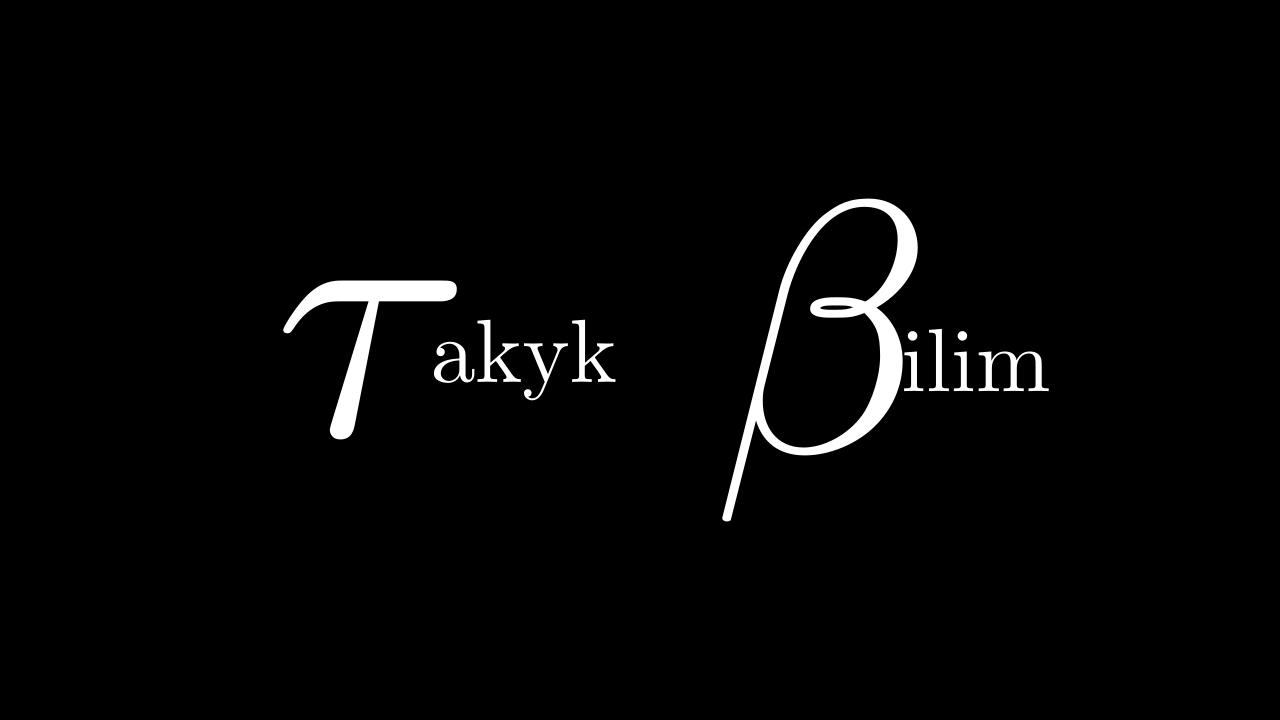

In [175]:
class Icon(Scene):
    def construct(self):
        t=Tex(r"$\tau$").scale(8).move_to(LEFT*3)
        b=Tex(r"$\beta $ ").scale(8).move_to(RIGHT*2)
        
        takyk=Tex("akyk").next_to(t, RIGHT).scale(2)
        bilim=Tex(" ilim").next_to(b, RIGHT).scale(2)
        self.add(t, b, takyk, bilim)
        
        
%manim -qm -v WARNING Icon

In [314]:
class Ohms_law_s_f(Scene):
    def construct(self):
        
        I_s=MathTex(r"I=I_1=I_2=I_3").set_color(BLUE)
        U_s=MathTex( r"U=U_1+U_2+U_3")

        U_s1=MathTex(r"IR=IR_1+IR_2+IR_3")
        R_s=MathTex(r"R=R_1+R_2+R_3").set_color(RED)


        eqs=VGroup(I_s, U_s, U_s1, R_s).arrange(DOWN, aligned_edge=LEFT).scale(2)
#         self.add(eqs)
        
        anim=[Write(I_s), Write(U_s), Write(U_s1), ReplacementTransform(U_s1, R_s)]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
        
        self.wait(3)

%manim -qh -v WARNING Ohms_law_s_f
    
    

Manim Community v0.18.1

In [316]:
class Ohms_law_p_f(Scene):
    def construct(self):
        
        I_s=MathTex(r"I=I_1+I_2+I_3").set_color(BLUE)
        U_s=MathTex( r"U=U_1=U_2=U_3")

        U_s1=MathTex(r"\frac{U}{R}=\frac{U}{R_1}+\frac{U}{R_2}+\frac{U}{R_3}")
        R_s=MathTex(r"\frac{1}{R}=\frac{1}{R_1}+\frac{1}{R_2}+\frac{1}{R_3}").set_color(RED)


        eqs=VGroup(I_s, U_s, U_s1, R_s).arrange(DOWN, aligned_edge=LEFT).scale(2)
#         self.add(eqs)
        
        anim=[Write(I_s), Write(U_s), Write(U_s1), ReplacementTransform(U_s1, R_s)]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
        
        self.wait(3)

%manim -qh -v WARNING Ohms_law_p_f

Manim Community v0.18.1

In [324]:
class Seq_ex_f(Scene):
    def construct(self):
        U1=MathTex(r"U_1=10.67 \; W")
        U2=MathTex(r"U_2=13.33 \; W")
        U3=MathTex(r"U_3=16 W")
        
        U=MathTex(r"U=10.67+13.33+16")
        Uf=MathTex(r"U=40 W")
        
        eqs=VGroup(U1, U2, U3, U, Uf).arrange(DOWN, aligned_edge=LEFT).scale(2)
        
        
        
        anim=[Write(U1), Write(U2), Write(U3), Write(U), ReplacementTransform(U, Uf)]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
            
        self.wait(3)
        
%manim -qh -v WARNING Seq_ex_f

Manim Community v0.18.1

In [327]:
class P_ex_f(Scene):
    def construct(self):
        U1=MathTex(r"I_1=5 \; A")
        U2=MathTex(r"I_2=3.33 \; A")
        U3=MathTex(r"I_3=4 \; A")
        
        U=MathTex(r"I=5+3.33+4")
        Uf=MathTex(r"I=12.33 \; A")
        
        eqs=VGroup(U1, U2, U3, U, Uf).set_color(BLUE).arrange(DOWN, aligned_edge=LEFT).scale(2)
        
        
        
        anim=[Write(U1), Write(U2), Write(U3), Write(U), ReplacementTransform(U, Uf)]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
            
        self.wait(3)
        
%manim -qh -v WARNING P_ex_f

Manim Community v0.18.1

In [329]:
class Om_f(Scene):
    def construct(self):
        U1=MathTex(r"I \propto \frac{1}{R}")
        U2=MathTex(r"I \propto U")
        U3=MathTex(r"I=\frac{U}{R}")

        
        eqs=VGroup(U1, U2, U3).set_color(BLUE).arrange(DOWN, aligned_edge=LEFT).scale(2)
        
        
        
        anim=[Write(U1), Write(U2), Write(U3)]
        
        for a in anim: 
            self.play(a)
            self.wait(1)
            
        self.wait(3)
        
%manim -qh -v WARNING Om_f

Manim Community v0.18.1

In [335]:
class Current(Scene):
    def construct(self):
        
        I_s=MathTex(r"I=\frac{q}{t}").set_color(BLUE).scale(4)
        
        self.play(Write(I_s))
        self.wait(2)
       

%manim -qh -v WARNING Current
    

Manim Community v0.18.1

In [5]:
from manim import * 

class SinusEquation_f(Scene):
    def construct(self):
        
        I_s=MathTex(r"a=A \sin{(\omega t +\phi_0)}").set_color(WHITE).scale(2)
        A=Tex(r"$A-$", "amplituda")
        om=Tex(r"$\omega=2\pi/T$-", "period")
        phi=Tex(r"$\phi_0$-", "başlangyç faza")
        
        eq=VGroup(I_s, A, om, phi).arrange(DOWN, aligned_edge=LEFT)
        
        anim=[Write(I_s), Write(A), Write(om), Write(phi)]
        
        for a in anim:
            self.play(a)
            self.wait(1)
        
        self.wait(2)
       

%manim -qh -v WARNING SinusEquation_f

Manim Community v0.18.1